In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch.nn as nn
import torch.optim as optim

In [3]:
from training import Coach
from utils import MnistData
from models import ModelManager, ModelType

In [4]:
data = MnistData()

In [5]:
simple, rmsprop = [], []

In [6]:
for i in range(10):
    print(f'--- ({i}) ---')
    model = ModelManager.get_untrained(ModelType.MnistCnnKarel)
    Coach.train(
        model,
        data,
        nn.CrossEntropyLoss(reduction='sum'),
        optim.SGD(model.parameters(), lr=1e-2),
        30,
        5001,
        5000
    )
    simple.append(Coach.measure_performance(model, data))

--- (0) ---
Training started at 1645391305.4130933
Epoch 0: 68.98544311523438
Epoch 5000: 44.20166015625
Training finished at 1645391343.6198564; lasted 38.20676302909851 seconds.
96.63000000000001 % success on test data
--- (1) ---
Training started at 1645391344.7086573
Epoch 0: 69.14533996582031
Epoch 5000: 45.73564910888672
Training finished at 1645391380.9525087; lasted 36.24385142326355 seconds.
96.47 % success on test data
--- (2) ---
Training started at 1645391382.0327425
Epoch 0: 68.98013305664062
Epoch 5000: 43.835330963134766
Training finished at 1645391418.8545723; lasted 36.8218297958374 seconds.
96.76 % success on test data
--- (3) ---
Training started at 1645391419.9208028
Epoch 0: 69.02056884765625
Epoch 5000: 45.82530975341797
Training finished at 1645391457.0720026; lasted 37.15119981765747 seconds.
96.81 % success on test data
--- (4) ---
Training started at 1645391458.1926904
Epoch 0: 69.04864501953125
Epoch 5000: 46.7503776550293
Training finished at 1645391494.5718

In [7]:
for i in range(10):
    print(f'--- ({i}) ---')
    model = ModelManager.get_untrained(ModelType.MnistCnnKarel)
    Coach.train(
        model,
        data,
        nn.CrossEntropyLoss(reduction='sum'),
        optim.RMSprop(model.parameters(), lr=1e-3),
        30,
        5001,
        5000
    )
    rmsprop.append(Coach.measure_performance(model, data))

--- (0) ---
Training started at 1645391683.575947
Epoch 0: 69.13257598876953
Epoch 5000: 46.85121154785156
Training finished at 1645391726.4044678; lasted 42.82852077484131 seconds.
96.92 % success on test data
--- (1) ---
Training started at 1645391727.5291378
Epoch 0: 69.18264770507812
Epoch 5000: 44.982398986816406
Training finished at 1645391768.3372688; lasted 40.808130979537964 seconds.
97.22 % success on test data
--- (2) ---
Training started at 1645391769.440366
Epoch 0: 69.0832748413086
Epoch 5000: 43.84394454956055
Training finished at 1645391809.8338492; lasted 40.39348316192627 seconds.
96.88 % success on test data
--- (3) ---
Training started at 1645391810.9322996
Epoch 0: 68.99546813964844
Epoch 5000: 43.83550262451172
Training finished at 1645391850.706479; lasted 39.774179458618164 seconds.
97.69 % success on test data
--- (4) ---
Training started at 1645391851.7624273
Epoch 0: 69.11312866210938
Epoch 5000: 44.04920959472656
Training finished at 1645391890.8806505; last

In [8]:
import matplotlib.pylab as lab

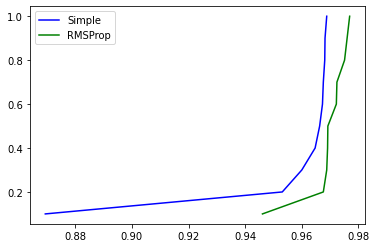

In [9]:
# for performences in [sorted(simple), sorted(momentum), sorted(nesterov)]:
performences = sorted(simple)
distribution = {}
for i in range(1, len(performences) + 1):
    distribution[performences[i - 1]] = i / len(performences)
my_list = distribution.items()
sorted(my_list)
x, y = zip(*my_list)
lab.plot(x, y, color = "blue", label="Simple")

performences = sorted(rmsprop)
distribution = {}
for i in range(1, len(performences) + 1):
    distribution[performences[i - 1]] = i / len(performences)
my_list = distribution.items()
sorted(my_list)
x, y = zip(*my_list)
lab.plot(x, y, color="green", label="RMSProp")

lab.legend()